<a href="https://colab.research.google.com/github/boomermiesterr/Purchase-Prediction/blob/main/PurchasePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this Project is use for

# import libary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Translated_Data_for_Analysis.csv')

In [ ]:
df.head()

,Gender,Age,Field of Study,Monthly Income,Shopping Frequency,Favorite Product Type,Shopping Channel,Purchase Factor,Buy on Promotion,Delivery Impact,Purchase Time,Purchase Place,Satisfaction Level,Improvement Needed,Info Source,Social Media Influence
0,Female,Under 18,Other,"10,001-15,000 THB",More than 4 times,Clothing/Fashion,Other,Discounts/Promotions,No,High Impact,Afternoon,Other,Moderately Satisfied,Delivery Speed,Review Websites,Yes
1,Male,18-22,Science,"5,000-10,000 THB",0-1 times,Clothing/Fashion,Websites,Price,Yes,High Impact,Late Night,Home,Very Satisfied,Delivery Speed,Store Apps,Yes
2,Other,Over 25,Engineering,"Above 15,000 THB",More than 4 times,Clothing/Fashion,Websites,Discounts/Promotions,No,No Impact,Morning,Work,Not Satisfied,Delivery Speed,Review Websites,No
3,Male,Over 25,Liberal Arts,"Below 5,000 THB",2-4 times,Books/Learning Materials,Websites,Convenience,Yes,Moderate Impact,Late Night,Other,Very Satisfied,Ease of Selection,Other,No
4,Female,23-25,Other,"10,001-15,000 THB",0-1 times,Books/Learning Materials,Websites,Discounts/Promotions,Yes,No Impact,Late Night,Other,Not Satisfied,Customer Service,Store Apps,Yes


# EDA

## สร้างกราฟการกระจายข้อมูลโดยใช้ for loop

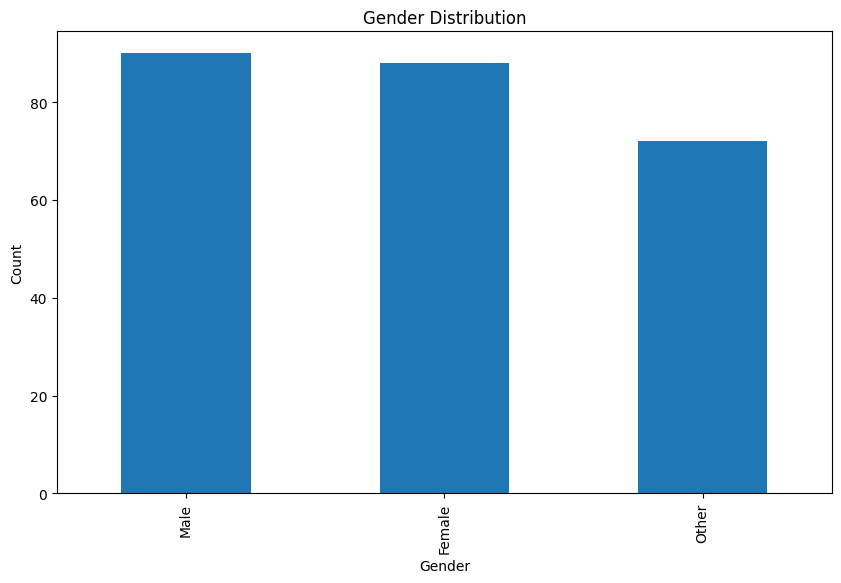

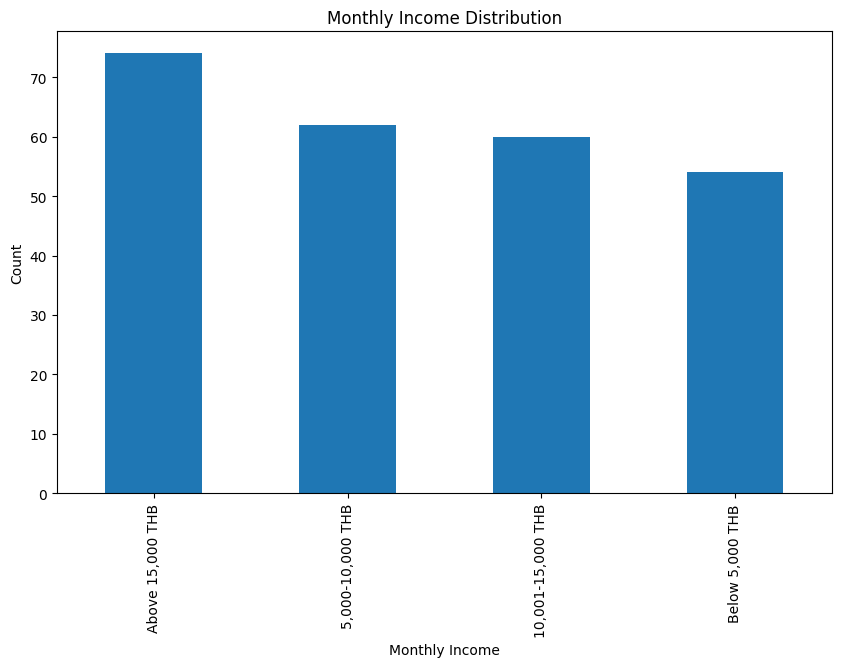

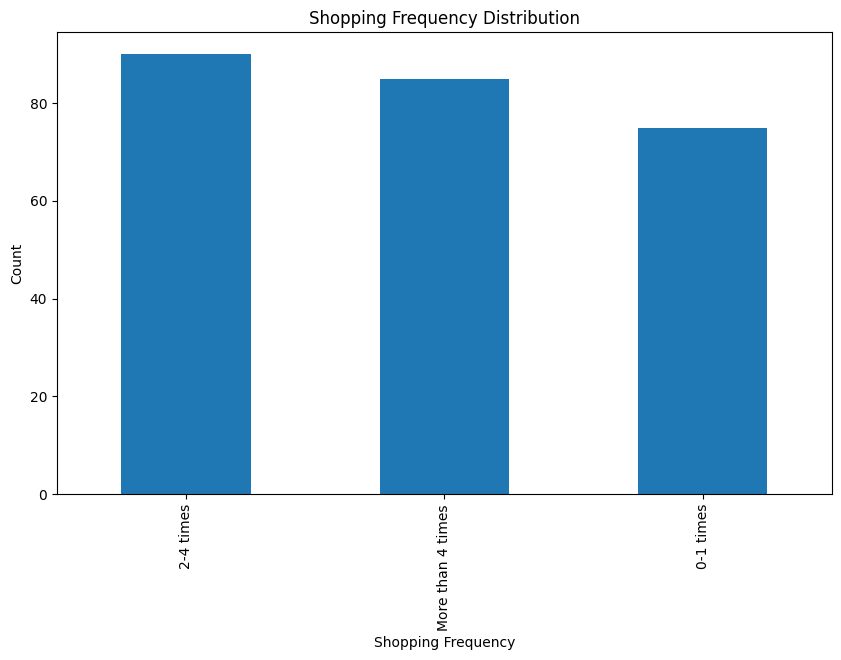

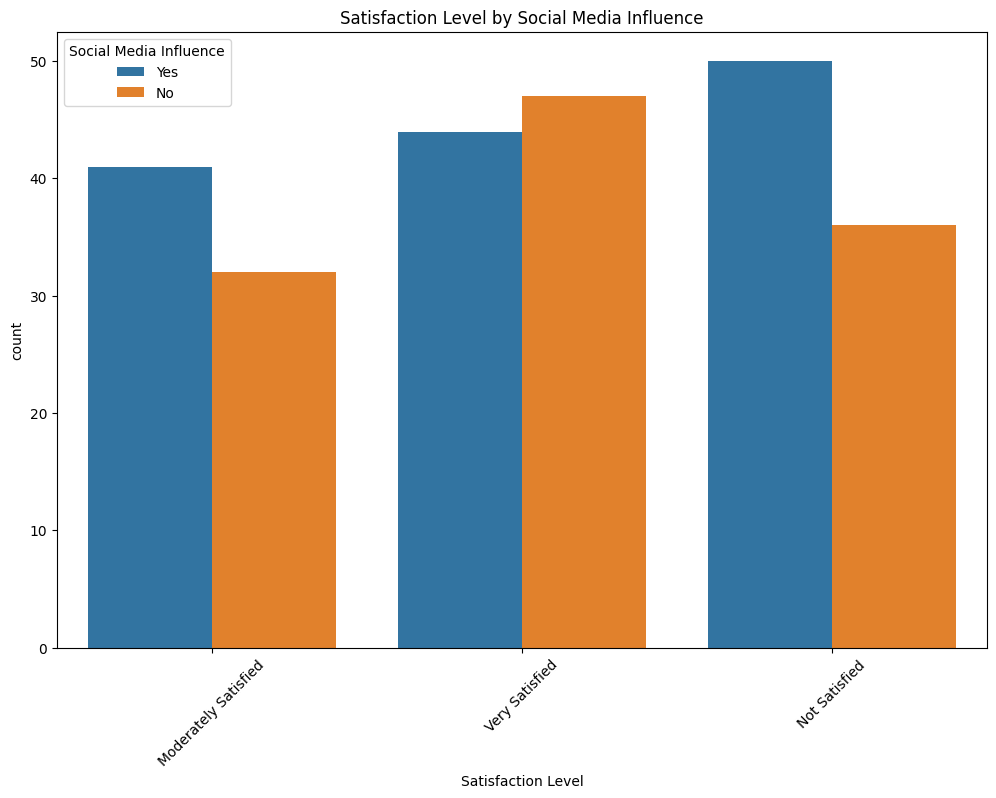

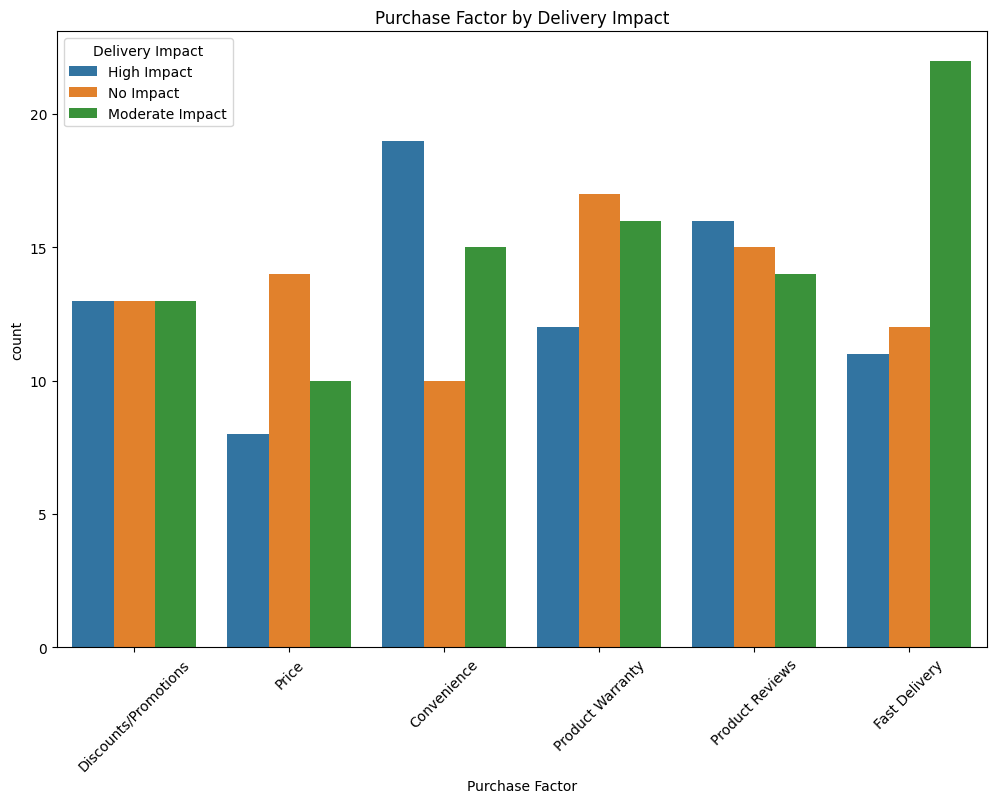

In [11]:
columns_to_plot = ['Gender', 'Monthly Income', 'Shopping Frequency']

# สร้างกราฟการกระจายข้อมูลโดยใช้ for loop
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', title=f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# วิเคราะห์ความสัมพันธ์ระหว่าง Satisfaction Level กับตัวแปรอื่น ๆ
relations = [
    ('Satisfaction Level', 'Social Media Influence'),
    ('Purchase Factor', 'Delivery Impact')
]

# สร้างกราฟความสัมพันธ์โดยใช้ for loop
for x, hue in relations:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=x, hue=hue)
    plt.title(f'{x} by {hue}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df['Satisfaction Level'].nunique()

3

# เลือก columns

In [ ]:
# เลือกคอลัมน์ที่คิดว่ามีความสำคัญ
selected_columns = ['Age','Gender', 'Monthly Income', 'Shopping Frequency',
                    'Purchase Factor', 'Buy on Promotion', 'Social Media Influence', 'Satisfaction Level']

# สร้าง DataFrame ใหม่จากคอลัมน์ที่เลือก
df = df[selected_columns]


In [ ]:
df.head()

,Age,Gender,Monthly Income,Shopping Frequency,Purchase Factor,Buy on Promotion,Social Media Influence,Satisfaction Level
0,Under 18,Female,"10,001-15,000 THB",More than 4 times,Discounts/Promotions,No,Yes,Moderately Satisfied
1,18-22,Male,"5,000-10,000 THB",0-1 times,Price,Yes,Yes,Very Satisfied
2,Over 25,Other,"Above 15,000 THB",More than 4 times,Discounts/Promotions,No,No,Not Satisfied
3,Over 25,Male,"Below 5,000 THB",2-4 times,Convenience,Yes,No,Very Satisfied
4,23-25,Female,"10,001-15,000 THB",0-1 times,Discounts/Promotions,Yes,Yes,Not Satisfied


In [ ]:
# แปลง 'Yes'/'No' เป็น 1/0 ในคอลัมน์ที่เป็นข้อความ
df['Buy on Promotion'] = df['Buy on Promotion'].map({'Yes': 1, 'No': 0})
df['Social Media Influence'] = df['Social Media Influence'].map({'Yes': 1, 'No': 0})

Create new variable for TARGET

In [ ]:
# กำหนดค่าเริ่มต้นของ Decision_to_Buy เป็น 0
df['Decision_to_Buy'] = 0

# ปรับเงื่อนไขการกำหนด Decision_to_Buy ให้มีหลายปัจจัยและเพิ่มความหลากหลาย
df.loc[(df['Shopping Frequency'] == 'More than 4 times') &
       (df['Satisfaction Level'] == 'Very Satisfied'), 'Decision_to_Buy'] = 1

df.loc[(df['Buy on Promotion'] == 'Yes') &
       (df['Purchase Factor'] == 'Discounts/Promotions') &
       (df['Monthly Income'] == 'Above 15,000 THB'), 'Decision_to_Buy'] = 1


Visulization

In [ ]:
df.head()

,Age,Gender,Monthly Income,Shopping Frequency,Purchase Factor,Buy on Promotion,Social Media Influence,Satisfaction Level,Decision_to_Buy
0,Under 18,Female,"10,001-15,000 THB",More than 4 times,Discounts/Promotions,0,1,Moderately Satisfied,0
1,18-22,Male,"5,000-10,000 THB",0-1 times,Price,1,1,Very Satisfied,0
2,Over 25,Other,"Above 15,000 THB",More than 4 times,Discounts/Promotions,0,0,Not Satisfied,0
3,Over 25,Male,"Below 5,000 THB",2-4 times,Convenience,1,0,Very Satisfied,0
4,23-25,Female,"10,001-15,000 THB",0-1 times,Discounts/Promotions,1,1,Not Satisfied,0


In [ ]:
#show data Decision_to_Buy = 1
df[df['Decision_to_Buy'] == 1]

,Age,Gender,Monthly Income,Shopping Frequency,Purchase Factor,Buy on Promotion,Social Media Influence,Satisfaction Level,Decision_to_Buy
6,Over 25,Male,"10,001-15,000 THB",More than 4 times,Product Warranty,0,0,Very Satisfied,1
9,Under 18,Other,"5,000-10,000 THB",More than 4 times,Discounts/Promotions,0,1,Very Satisfied,1
25,Under 18,Other,"Above 15,000 THB",More than 4 times,Price,1,1,Very Satisfied,1
46,Over 25,Male,"5,000-10,000 THB",More than 4 times,Product Warranty,0,0,Very Satisfied,1
55,Over 25,Female,"5,000-10,000 THB",More than 4 times,Convenience,0,1,Very Satisfied,1
80,23-25,Other,"Below 5,000 THB",More than 4 times,Convenience,0,0,Very Satisfied,1
96,23-25,Female,"Above 15,000 THB",More than 4 times,Fast Delivery,0,0,Very Satisfied,1
97,Over 25,Female,"Above 15,000 THB",More than 4 times,Convenience,1,1,Very Satisfied,1
104,Under 18,Other,"Below 5,000 THB",More than 4 times,Product Warranty,0,1,Very Satisfied,1
118,Under 18,Female,"5,000-10,000 THB",More than 4 times,Discounts/Promotions,1,0,Very Satisfied,1


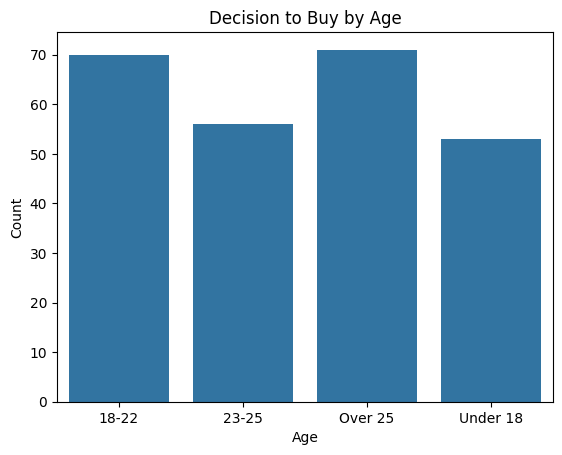

In [ ]:
df_grouped = df.groupby('Age')['Decision_to_Buy'].count()
df_grouped
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Decision to Buy by Age')
plt.show()

endcoding cetegorical

In [ ]:
df.dtypes

,0
Age,object
Gender,object
Monthly Income,object
Shopping Frequency,object
Purchase Factor,object
Buy on Promotion,int64
Social Media Influence,int64
Satisfaction Level,object
Decision_to_Buy,int64


In [ ]:
# ใช้ pd.get_dummies() เพื่อแปลงคอลัมน์เชิงหมวดหมู่ที่เหลือ
df_encoded = pd.get_dummies(df, columns=[
    'Age', 'Gender', 'Monthly Income', 'Shopping Frequency',
    'Purchase Factor', 'Satisfaction Level'
])

# แสดงผลลัพธ์ที่ได้
print(df_encoded.head())


   Buy on Promotion  Social Media Influence  Decision_to_Buy  Age_18-22  \
0                 0                       1                0      False   
1                 1                       1                0       True   
2                 0                       0                0      False   
3                 1                       0                0      False   
4                 1                       1                0      False   

   Age_23-25  Age_Over 25  Age_Under 18  Gender_Female  Gender_Male  \
0      False        False          True           True        False   
1      False        False         False          False         True   
2      False         True         False          False        False   
3      False         True         False          False         True   
4       True        False         False           True        False   

   Gender_Other  ...  Shopping Frequency_More than 4 times  \
0         False  ...                                  True  

In [ ]:
# แปลงค่า True/False เป็น 1/0 สำหรับทั้ง DataFrame
df_encoded = df_encoded.astype(int)

# แสดงข้อมูลที่แปลงแล้ว
print(df_encoded.head())


   Buy on Promotion  Social Media Influence  Decision_to_Buy  Age_18-22  \
0                 0                       1                0          0   
1                 1                       1                0          1   
2                 0                       0                0          0   
3                 1                       0                0          0   
4                 1                       1                0          0   

   Age_23-25  Age_Over 25  Age_Under 18  Gender_Female  Gender_Male  \
0          0            0             1              1            0   
1          0            0             0              0            1   
2          0            1             0              0            0   
3          0            1             0              0            1   
4          1            0             0              1            0   

   Gender_Other  ...  Shopping Frequency_More than 4 times  \
0             0  ...                                     1  

In [ ]:
df_encoded

NameError: name 'df_encoded' is not defined

#Train and split

In [ ]:
from sklearn.model_selection import train_test_split

# แยก Features และ Target Variable
X = df_encoded.drop('Decision_to_Buy', axis=1)
y = df_encoded['Decision_to_Buy']

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ (80% ฝึก, 20% ทดสอบ)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(df_encoded.dtypes)


Buy on Promotion                           int64
Social Media Influence                     int64
Decision_to_Buy                            int64
Age_18-22                                  int64
Age_23-25                                  int64
Age_Over 25                                int64
Age_Under 18                               int64
Gender_Female                              int64
Gender_Male                                int64
Gender_Other                               int64
Monthly Income_10,001-15,000 THB           int64
Monthly Income_5,000-10,000 THB            int64
Monthly Income_Above 15,000 THB            int64
Monthly Income_Below 5,000 THB             int64
Shopping Frequency_0-1 times               int64
Shopping Frequency_2-4 times               int64
Shopping Frequency_More than 4 times       int64
Purchase Factor_Convenience                int64
Purchase Factor_Discounts/Promotions       int64
Purchase Factor_Fast Delivery              int64
Purchase Factor_Pric

In [ ]:
# ตรวจสอบชนิดข้อมูลของแต่ละคอลัมน์
print(X_train.dtypes)


Buy on Promotion                           int64
Social Media Influence                     int64
Age_18-22                                  int64
Age_23-25                                  int64
Age_Over 25                                int64
Age_Under 18                               int64
Gender_Female                              int64
Gender_Male                                int64
Gender_Other                               int64
Monthly Income_10,001-15,000 THB           int64
Monthly Income_5,000-10,000 THB            int64
Monthly Income_Above 15,000 THB            int64
Monthly Income_Below 5,000 THB             int64
Shopping Frequency_0-1 times               int64
Shopping Frequency_2-4 times               int64
Shopping Frequency_More than 4 times       int64
Purchase Factor_Convenience                int64
Purchase Factor_Discounts/Promotions       int64
Purchase Factor_Fast Delivery              int64
Purchase Factor_Price                      int64
Purchase Factor_Prod

In [ ]:
print(y_train.dtypes)

int64


In [ ]:
# ตรวจสอบค่าที่หายไปใน DataFrame
print(X_train.isnull().sum())


Buy on Promotion                           0
Social Media Influence                     0
Age_18-22                                  0
Age_23-25                                  0
Age_Over 25                                0
Age_Under 18                               0
Gender_Female                              0
Gender_Male                                0
Gender_Other                               0
Monthly Income_10,001-15,000 THB           0
Monthly Income_5,000-10,000 THB            0
Monthly Income_Above 15,000 THB            0
Monthly Income_Below 5,000 THB             0
Shopping Frequency_0-1 times               0
Shopping Frequency_2-4 times               0
Shopping Frequency_More than 4 times       0
Purchase Factor_Convenience                0
Purchase Factor_Discounts/Promotions       0
Purchase Factor_Fast Delivery              0
Purchase Factor_Price                      0
Purchase Factor_Product Reviews            0
Purchase Factor_Product Warranty           0
Satisfacti

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# ทำนายผลบนชุดทดสอบ
y_pred = model.predict(X_test)

# ประเมินผลการทำงานของโมเดล
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # เชื่อมต่อ Google Drive


Mounted at /content/drive


In [ ]:
from joblib import dump, load

In [ ]:
dump(model, '/content/drive/My Drive/my_model.joblib')  # บันทึกโมเดลใน Google Drive


['/content/drive/My Drive/my_model.joblib']

Feature: Buy on Promotion, Score: -0.04098010707380134
Feature: Social Media Influence, Score: -0.26708582902106354
Feature: Age_18-22, Score: 0.15643232078006142
Feature: Age_23-25, Score: 0.3787206495420288
Feature: Age_Over 25, Score: -0.35068472177649157
Feature: Age_Under 18, Score: -0.18520166178290523
Feature: Gender_Female, Score: 0.04778453811584648
Feature: Gender_Male, Score: -0.148634527655539
Feature: Gender_Other, Score: 0.10011657630238566
Feature: Monthly Income_10,001-15,000 THB, Score: 0.10889483562712667
Feature: Monthly Income_5,000-10,000 THB, Score: 0.009942613204642025
Feature: Monthly Income_Above 15,000 THB, Score: -0.3398852294186706
Feature: Monthly Income_Below 5,000 THB, Score: 0.22031436734959484
Feature: Shopping Frequency_0-1 times, Score: -1.1428362943641748
Feature: Shopping Frequency_2-4 times, Score: -1.173698155411126
Feature: Shopping Frequency_More than 4 times, Score: 2.3158010365379944
Feature: Purchase Factor_Convenience, Score: -0.055922454748

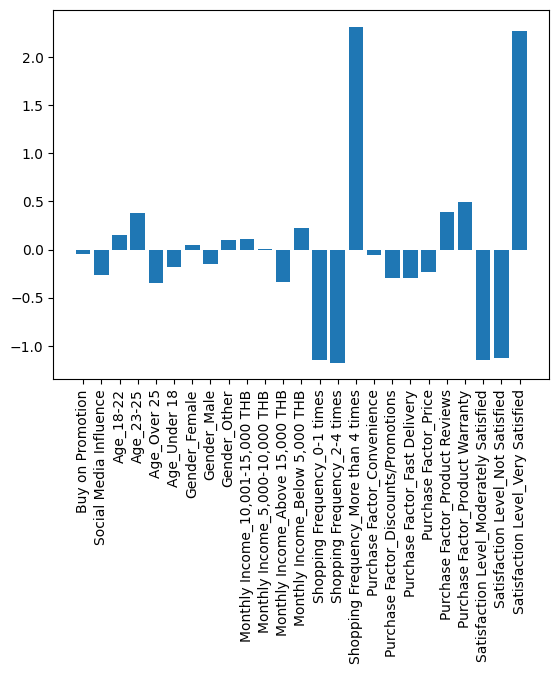

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

# หรือแสดงกราฟเพื่อดูความสำคัญ
import matplotlib.pyplot as plt

plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns, rotation='vertical')
plt.show()


AUC-ROC Score for Class 0: 1.0
AUC-ROC Score for Class 1: 1.0


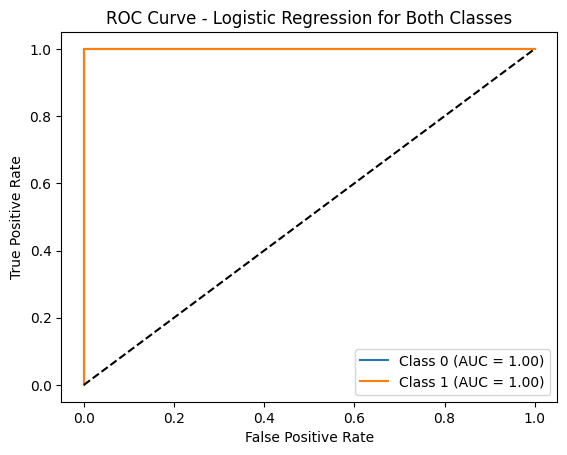

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ทำนายความน่าจะเป็นของคลาส 0 และ 1
y_prob = model.predict_proba(X_test)

# คำนวณค่า AUC-ROC สำหรับแต่ละคลาส
auc_score_class_0 = roc_auc_score(y_test == 0, y_prob[:, 0])
auc_score_class_1 = roc_auc_score(y_test == 1, y_prob[:, 1])
print("AUC-ROC Score for Class 0:", auc_score_class_0)
print("AUC-ROC Score for Class 1:", auc_score_class_1)

# สร้าง ROC Curve สำหรับคลาส 0
fpr_class_0, tpr_class_0, _ = roc_curve(y_test == 0, y_prob[:, 0])
plt.plot(fpr_class_0, tpr_class_0, label=f"Class 0 (AUC = {auc_score_class_0:.2f})")

# สร้าง ROC Curve สำหรับคลาส 1
fpr_class_1, tpr_class_1, _ = roc_curve(y_test == 1, y_prob[:, 1])
plt.plot(fpr_class_1, tpr_class_1, label=f"Class 1 (AUC = {auc_score_class_1:.2f})")

# เส้นทแยงมุมเพื่อเปรียบเทียบกับการทำนายแบบสุ่ม
plt.plot([0, 1], [0, 1], 'k--')

# การตั้งค่ากราฟ
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression for Both Classes")
plt.legend(loc="lower right")
plt.show()


#smote

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
# สร้าง Logistic Regression model ใหม่
model = LogisticRegression()

# ฝึกโมเดลด้วยข้อมูลที่ผ่าน SMOTE แล้ว
model.fit(X_train_balanced, y_train_balanced)


LogisticRegression()

In [ ]:
# ทำการทำนายผลลัพธ์ของชุดทดสอบ
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred_rf = rf_model.predict(X_test)

# แสดงผลลัพธ์
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Random Forest AUC-ROC Score: 1.0


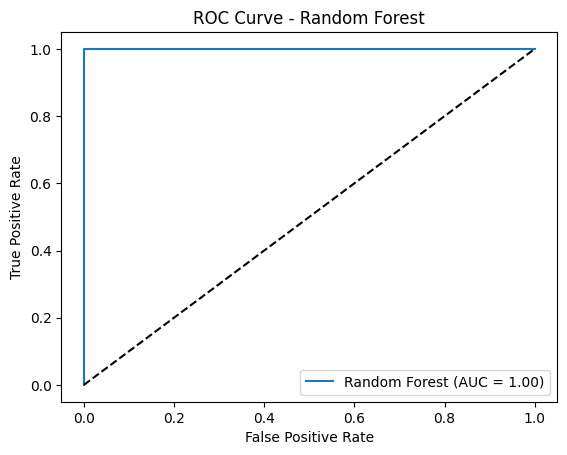

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ทำนายความน่าจะเป็น (probabilities) ของคลาส 1
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# คำนวณค่า AUC
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC-ROC Score:", auc_score_rf)

# สร้าง ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # เส้นทแยงมุม
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# สร้างและฝึกโมเดล Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred_gb = gb_model.predict(X_test)

# แสดงผลลัพธ์
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# ประเมินผลโมเดลบนข้อมูลฝึก
y_pred_train = gb_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

# ประเมินผลโมเดลบนข้อมูลทดสอบ
y_pred_test = gb_model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

# ใช้ Cross-Validation กับ Gradient Boosting
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


auc roc

AUC-ROC Score: 1.0


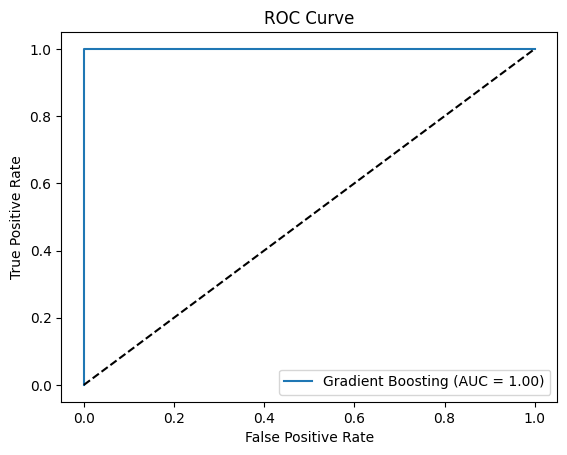

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ทำนายความน่าจะเป็น (probabilities) ของคลาส 1
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# คำนวณค่า AUC
auc_score = roc_auc_score(y_test, y_prob_gb)
print("AUC-ROC Score:", auc_score)

# สร้าง ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # เส้นทแยงมุม
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


app.py

In [ ]:
from flask import Flask, request, render_template, redirect, url_for
import joblib
import pandas as pd

app = Flask(__name__)

# โหลดโมเดลที่บันทึกไว้
model = joblib.load('my_model.joblib')


# หน้าแรก
@app.route('/')
def home():
    return render_template('index.html')


# หน้า login
@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        # ตรวจสอบ username และ password
        if username == 'admin' and password == 'password':
            return redirect(url_for('predict'))
        else:
            error = 'Invalid credentials'
            return render_template('login.html', error=error)
    return render_template('login.html')


# หน้า predict (รับข้อมูลจากฟอร์มและพยากรณ์)
@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        try:
            input_data = {
                'Gender': request.form['Gender'],
                'Age': request.form['Age'],
                'Monthly Income': request.form['Monthly Income'],
                'Shopping Frequency': request.form['Shopping Frequency'],
                'Purchase Factor': request.form['Purchase Factor'],
                'Buy on Promotion': request.form['Buy on Promotion'],
                'Satisfaction Level': request.form['Satisfaction Level']
            }

            # แปลง input_data เป็น DataFrame
            input_df = pd.DataFrame([input_data])

            # แปลง categorical เป็น One-Hot Encoding
            input_df_encoded = pd.get_dummies(input_df)

            # จัดให้คอลัมน์ตรงกับโมเดลที่ถูกฝึกไว้
            for col in model.feature_names_in_:
                if col not in input_df_encoded.columns:
                    input_df_encoded[col] = 0
            input_df_encoded = input_df_encoded[model.feature_names_in_]

            # ทำการพยากรณ์
            prediction = model.predict_proba(input_df_encoded)
            probability = prediction[0][1]  # รับค่าความน่าจะเป็นของ class '1'

            # ส่งผลลัพธ์ไปที่หน้า result
            result = f'โอกาสในการซื้อ: {probability * 100:.2f}% และโอกาสที่จะไม่ซื้อ: {(1 - probability) * 100:.2f}%'
            return render_template('result.html', prediction_text=result)

        except Exception as e:
            return render_template('result.html', prediction_text=f'Error: {e}')
    return render_template('predict.html')


# เริ่มรันแอป
if __name__ == '__main__':
    app.run(debug=True)


index.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Landing Page</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
</head>
<body>
    <div class="landing-container">
        <h1>Online Shopping Trends and Behavioral Shifts</h1>
        <a href="{{ url_for('login') }}" class="btn">Start</a>
    </div>
</body>
</html>


login.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
</head>
<body>
    <div class="login-container">
        <h2>Login</h2>
        {% if error %}
            <p class="error">{{ error }}</p>
        {% endif %}
        <form method="POST">
            <input type="text" name="username" placeholder="Username" required>
            <input type="password" name="password" placeholder="Password" required>
            <button type="submit" class="btn">Login</button>
        </form>
    </div>
</body>
</html>


predict.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Purchase Prediction</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
</head>
<body>
    <div class="container mt-5">
        <h2 class="text-center">Purchase Prediction using Machine Learning</h2>
        <form method="POST" action="/predict" class="mt-4 p-4 rounded shadow-sm bg-light">
            <div class="form-row">
                <div class="form-group col-md-6">
                    <label for="Gender">Gender</label>
                    <select id="Gender" name="Gender" class="form-control" required>
                        <option>Female</option>
                        <option>Male</option>
                        <option>Other</option>
                    </select>
                </div>
                <div class="form-group col-md-6">
                    <label for="Age">Age</label>
                    <select id="Age" name="Age" class="form-control" required>
                        <option>Under 18</option>
                        <option>18-22</option>
                        <option>23-25</option>
                        <option>Over 25</option>
                    </select>
                </div>
            </div>

            <!-- ส่วนที่เหลือของฟิลด์ข้อมูล -->
            <div class="form-row">
                <div class="form-group col-md-6">
                    <label for="Monthly Income">Monthly Income</label>
                    <select id="Monthly Income" name="Monthly Income" class="form-control" required>
                        <option>Below 5,000 THB</option>
                        <option>5,000-10,000 THB</option>
                        <option>10,001-15,000 THB</option>
                        <option>Above 15,000 THB</option>
                    </select>
                </div>
                <div class="form-group col-md-6">
                    <label for="Shopping Frequency">Shopping Frequency</label>
                    <select id="Shopping Frequency" name="Shopping Frequency" class="form-control" required>
                        <option>0-1 times</option>
                        <option>2-4 times</option>
                        <option>More than 4 times</option>
                    </select>
                </div>
            </div>

            <!-- แถวที่ 3 -->
            <div class="form-row">
                <div class="form-group col-md-6">
                    <label for="Purchase Factor">Purchase Factor</label>
                    <select id="Purchase Factor" name="Purchase Factor" class="form-control" required>
                        <option>Price</option>
                        <option>Discounts/Promotions</option>
                        <option>Convenience</option>
                        <option>Product Warranty</option>
                        <option>Product Reviews</option>
                        <option>Fast Delivery</option>
                    </select>
                </div>
                <div class="form-group col-md-6">
                    <label for="Buy on Promotion">Buy on Promotion</label>
                    <select id="Buy on Promotion" name="Buy on Promotion" class="form-control" required>
                        <option>Yes</option>
                        <option>No</option>
                    </select>
                </div>
            </div>

            <!-- แถวที่ 4 -->
            <div class="form-row">
                <div class="form-group col-md-6">
                    <label for="Satisfaction Level">Satisfaction Level</label>
                    <select id="Satisfaction Level" name="Satisfaction Level" class="form-control" required>
                        <option>Not Satisfied</option>
                        <option>Moderately Satisfied</option>
                        <option>Very Satisfied</option>
                    </select>
                </div>
            </div>

            <button type="submit" class="btn btn-primary btn-block mt-3">Predict</button>
        </form>
    </div>
</body>
</html>


result

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction Result</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
</head>
<body>
    <div class="container mt-5">
        <h2 class="text-center">Prediction Result</h2>
        <div class="result-box text-center p-4 mt-4 bg-light rounded shadow-sm">
            <h4>{{ prediction_text }}</h4>
            <a href="/predict" class="btn btn-secondary mt-3">Predict Again</a>
        </div>
    </div>
</body>
</html>


css

In [ ]:
body {
    font-family: Arial, sans-serif;
    display: flex;
    justify-content: center;
    align-items: center;
    height: 100vh;
    margin: 0;
    background: #f4f4f9;
}

.landing-container, .login-container, .form-container, .result-container {
    text-align: center;
}

h1, h2 {
    color: #333;
}

.btn {
    display: inline-block;
    padding: 10px 20px;
    color: #fff;
    background-color: #007bff;
    border: none;
    border-radius: 5px;
    text-decoration: none;
    cursor: pointer;
}

.error {
    color: red;
}
